<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [20]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

- Find out how many rows and columns are in `noise`.

In [21]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [22]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [23]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [24]:
noise.describe()

frequency        angle  chord_length  free_stream_velocity  \
count   1503.000000  1503.000000   1503.000000           1503.000000   
mean    2886.380572     6.782302      0.136548             50.860745   
std     3152.573137     5.918128      0.093541             15.572784   
min      200.000000     0.000000      0.025400             31.700000   
25%      800.000000     2.000000      0.050800             39.600000   
50%     1600.000000     5.400000      0.101600             39.600000   
75%     4000.000000     9.900000      0.228600             71.300000   
max    20000.000000    22.200000      0.304800             71.300000   

       displacement_thickness   self_noise  
count             1503.000000  1503.000000  
mean                 0.011140   124.835943  
std                  0.013150     6.898657  
min                  0.000401   103.380000  
25%                  0.002535   120.191000  
50%                  0.004957   125.721000  
75%                  0.015576   129.995500  
max                  0.058411   140.987000

- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

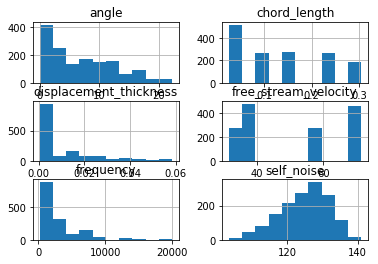

In [25]:
axes = noise.hist()

- Which variables are approximately normally distributed?

self_noise

- Which variables show strong skew?

angle, displacement_thickness, frequency

- Make a scatterplot of each feature variable with the target variable.

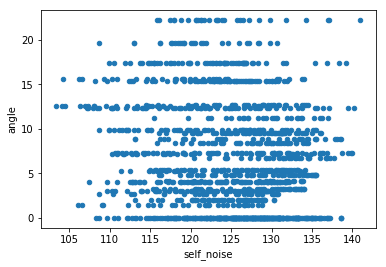

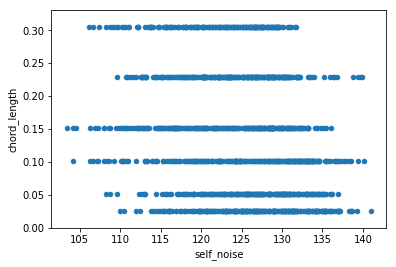

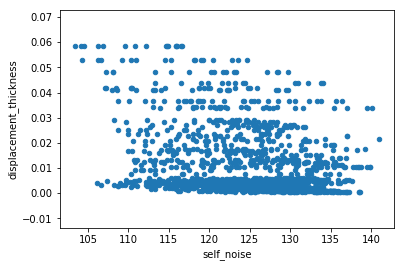

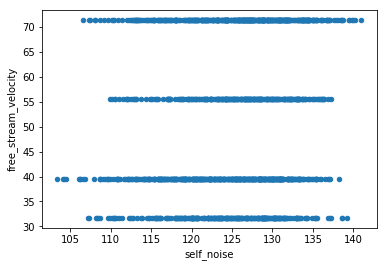

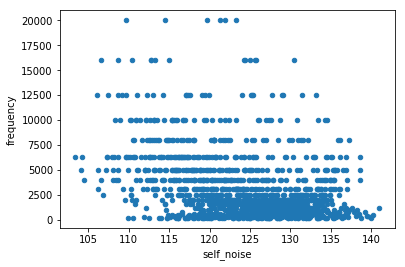

In [27]:
target_col = 'self_noise'
feature_cols = ['angle', 'chord_length', 'displacement_thickness', 'free_stream_velocity', 'frequency']
for col in feature_cols:
    noise.plot(kind='scatter', x='self_noise', y=col)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

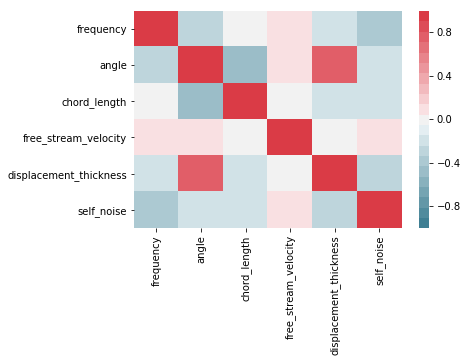

In [28]:
ax = sns.heatmap(noise.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220,10,n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

I notice that frequency is most correlated to self_noise. Also that angle and displacement_thickness and angle and chord_length have high correlations to one another.

- Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
target_col = 'self_noise'
feature_cols = ['angle', 'chord_length', 'displacement_thickness', 'free_stream_velocity', 'frequency']
X = noise.loc[:,feature_cols]
y = noise.loc[:,target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
print ('train', lr.score(X_train, y_train))
print ('test', lr.score(X_test, y_test))


train 0.49415298422528264
test 0.5568657324466675


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

This model performs pretty comparable to the null model since it scores around 50%. I would say it has slightly high bias and is likely underfitting.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

This model performs similarly on the test set as it does on the training. Since the two values are close, I would say this model doesn't have much of a variance problem.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

I would say this model has more of a bias problem because it is only scoring around a 50% on the training set.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
target_col = 'self_noise'
feature_cols = ['angle', 'chord_length', 'displacement_thickness', 'free_stream_velocity', 'frequency']
X = noise.loc[:,feature_cols]
y = noise.loc[:,target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
print ('train', rfr.score(X_train, y_train))
print('test', rfr.score(X_test, y_test))

train 0.9890323464363003
test 0.9292043582675846


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The overall predictive performance of this random forest model is way better than that of my linear regression model. The bias is much lower in the random forest model, but the variance is about the same as it is in the linear regression model.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#  tried dropping the angle column since it and displacement_thickness are highly correlated
target_col = 'self_noise'
feature_cols = ['angle', 'chord_length', 'displacement_thickness', 'free_stream_velocity', 'frequency']
X = noise.loc[:,feature_cols]
y = noise.loc[:,target_col]
X2 = noise.loc[:,feature_cols].drop('angle', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X2, y)

# tried changing n_estimator number higher and lower than 100 -- only slight variations of R^2
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train, y_train)
print ('train', rfr.score(X_train, y_train))
print('test', rfr.score(X_test, y_test))

train 0.9906482030071913
test 0.940523727873723


- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [71]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [72]:
credit.shape

(690, 16)

- Find out what data types are present.

In [73]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

In [74]:
#here I dummy coded column 16 to be 1 for + (approved) and 0 for - (denied)
credit.loc[:,16] = credit.loc[:,16].replace({'+': 1, '-': 0})

1      2       3  4  5   6   7       8  9  10  11 12 13     14     15  16
0    b  30.83   0.000  u  g   w   v   1.250  t  t   1  f  g  00202      0   1
1    a  58.67   4.460  u  g   q   h   3.040  t  t   6  f  g  00043    560   1
2    a  24.50   0.500  u  g   q   h   1.500  t  f   0  f  g  00280    824   1
3    b  27.83   1.540  u  g   w   v   3.750  t  t   5  t  g  00100      3   1
4    b  20.17   5.625  u  g   w   v   1.710  t  f   0  f  s  00120      0   1
5    b  32.08   4.000  u  g   m   v   2.500  t  f   0  t  g  00360      0   1
6    b  33.17   1.040  u  g   r   h   6.500  t  f   0  t  g  00164  31285   1
7    a  22.92  11.585  u  g  cc   v   0.040  t  f   0  f  g  00080   1349   1
8    b  54.42   0.500  y  p   k   h   3.960  t  f   0  f  g  00180    314   1
9    b  42.50   4.915  y  p   w   v   3.165  t  f   0  t  g  00052   1442   1
10   b  22.08   0.830  u  g   c   h   2.165  f  f   0  t  g  00128      0   1
11   b  29.92   1.835  u  g   c   h   4.335  t  f   0  f  g  00260    200   1
12   a  38.25   6.000  u  g   k   v   1.000  t  f   0  t  g  00000      0   1
13   b  48.08   6.040  u  g   k   v   0.040  f  f   0  f  g  00000   2690   1
14   a  45.83  10.500  u  g   q   v   5.000  t  t   7  t  g  00000      0   1
15   b  36.67   4.415  y  p   k   v   0.250  t  t  10  t  g  00320      0   1
16   b  28.25   0.875  u  g   m   v   0.960  t  t   3  t  g  00396      0   1
17   a  23.25   5.875  u  g   q   v   3.170  t  t  10  f  g  00120    245   1
18   b  21.83   0.250  u  g   d   h   0.665  t  f   0  t  g  00000      0   1
19   a  19.17   8.585  u  g  cc   h   0.750  t  t   7  f  g  00096      0   1
20   b  25.00  11.250  u  g   c   v   2.500  t  t  17  f  g  00200   1208   1
21   b  23.25   1.000  u  g   c   v   0.835  t  f   0  f  s  00300      0   1
22   a  47.75   8.000  u  g   c   v   7.875  t  t   6  t  g  00000   1260   1
23   a  27.42  14.500  u  g   x   h   3.085  t  t   1  f  g  00120     11   1
24   a  41.17   6.500  u  g   q   v   0.500  t  t   3  t  g  00145      0   1
25   a  15.83   0.585  u  g   c   h   1.500  t  t   2  f  g  00100      0   1
26   a  47.00  13.000  u  g   i  bb   5.165  t  t   9  t  g  00000      0   1
27   b  56.58  18.500  u  g   d  bb  15.000  t  t  17  t  g  00000      0   1
28   b  57.42   8.500  u  g   e   h   7.000  t  t   3  f  g  00000      0   1
29   b  42.08   1.040  u  g   w   v   5.000  t  t   6  t  g  00500  10000   1
..  ..    ...     ... .. ..  ..  ..     ... .. ..  .. .. ..    ...    ...  ..
660  b  22.25   9.000  u  g  aa   v   0.085  f  f   0  f  g  00000      0   0
661  b  29.83   3.500  u  g   c   v   0.165  f  f   0  f  g  00216      0   0
662  a  23.50   1.500  u  g   w   v   0.875  f  f   0  t  g  00160      0   0
663  b  32.08   4.000  y  p  cc   v   1.500  f  f   0  t  g  00120      0   0
664  b  31.08   1.500  y  p   w   v   0.040  f  f   0  f  s  00160      0   0
665  b  31.83   0.040  y  p   m   v   0.040  f  f   0  f  g  00000      0   0
666  a  21.75  11.750  u  g   c   v   0.250  f  f   0  t  g  00180      0   0
667  a  17.92   0.540  u  g   c   v   1.750  f  t   1  t  g  00080      5   0
668  b  30.33   0.500  u  g   d   h   0.085  f  f   0  t  s  00252      0   0
669  b  51.83   2.040  y  p  ff  ff   1.500  f  f   0  f  g  00120      1   0
670  b  47.17   5.835  u  g   w   v   5.500  f  f   0  f  g  00465    150   0
671  b  25.83  12.835  u  g  cc   v   0.500  f  f   0  f  g  00000      2   0
672  a  50.25   0.835  u  g  aa   v   0.500  f  f   0  t  g  00240    117   0
673  ?  29.50   2.000  y  p   e   h   2.000  f  f   0  f  g  00256     17   0
674  a  37.33   2.500  u  g   i   h   0.210  f  f   0  f  g  00260    246   0
675  a  41.58   1.040  u  g  aa   v   0.665  f  f   0  f  g  00240    237   0
676  a  30.58  10.665  u  g   q   h   0.085  f  t  12  t  g  00129      3   0
677  b  19.42   7.250  u  g   m   v   0.040  f  t   1  f  g  00100      1   0
678  a  17.92  10.210  u  g  ff  ff   0.000  f  f   0  f  g  00000     50   0
679  a  20.08   1.250  u  

- Columns 2 and 3 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [75]:
credit = credit[credit[2]  != '?']

In [76]:
credit = credit[credit[14] != '?']

In [77]:
credit.loc[:,2] = credit.loc[:, 2].astype('float64')

In [78]:
credit.loc[:,14] = credit.loc[:, 14].astype('float64')

In [79]:
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14    float64
15      int64
16      int64
dtype: object

- Find out how many null values there are in each columns.

In [80]:
credit.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [81]:
credit.describe()

2           3           8           11           14  \
count  666.000000  666.000000  666.000000  666.000000   666.000000   
mean    31.569054    4.798078    2.222320    2.459459   182.115616   
std     11.920174    5.005309    3.347599    4.929794   171.477919   
min     13.750000    0.000000    0.000000    0.000000     0.000000   
25%     22.602500    1.010000    0.165000    0.000000    75.250000   
50%     28.500000    2.750000    1.000000    0.000000   160.000000   
75%     38.250000    7.207500    2.585000    3.000000   271.000000   
max     80.250000   28.000000   28.500000   67.000000  2000.000000   

                  15          16  
count     666.000000  666.000000  
mean      998.584084    0.448949  
std      5202.975198    0.497761  
min         0.000000    0.000000  
25%         0.000000    0.000000  
50%         5.000000    0.000000  
75%       399.000000    1.000000  
max    100000.000000    1.000000

In [82]:
credit.describe(include='object')

1    4    5    6    7    9    10   12   13
count   666  666  666  666  666  666  666  666  666
unique    3    3    3   15   10    2    2    2    3
top       b    u    g    c    v    t    f    f    g
freq    451  508  508  135  388  352  376  359  609

- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

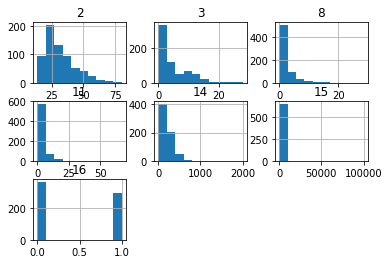

In [83]:
ax = credit.hist()

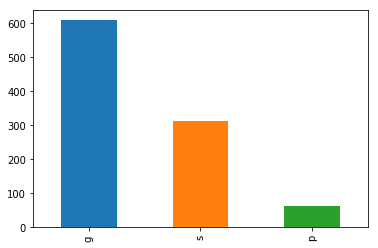

In [87]:
cat_cols = [1, 4, 5, 6, 7, 9, 10, 12, 13]
feat_cols = [2, 3, 8, 11, 14, 15]

for col in cat_cols:
    credit.loc[:,col].value_counts().plot(kind='bar')

- Which variables are approximately normally distributed?

2

- Which variables show strong skew?

3, 8, 11, 14

- Make a scatterplot of each feature variable with the target variable.

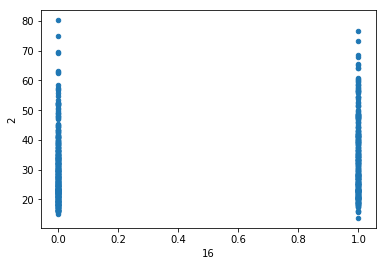

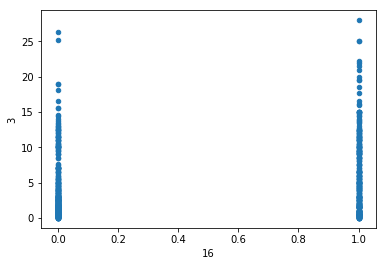

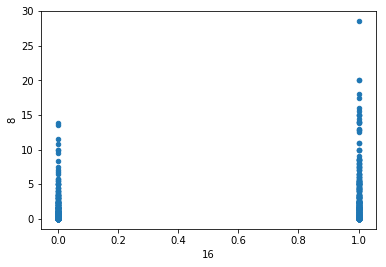

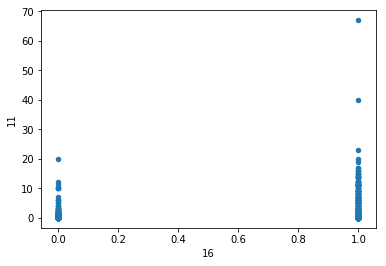

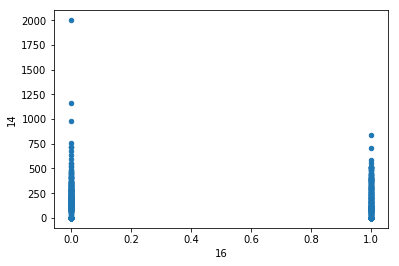

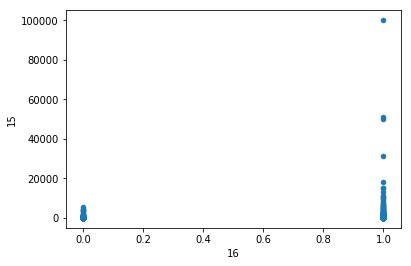

In [116]:
for col in feat_cols:
    credit.plot(kind='scatter', x=16, y=col)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

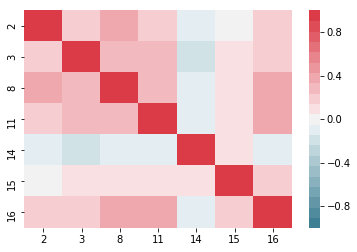

In [89]:
ax = sns.heatmap(credit.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220,10,n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

columns 8 & 11 are most strongly related to the target column

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [90]:
credit.loc[:,16].value_counts(normalize=True)

0    0.551051
1    0.448949
Name: 16, dtype: float64

- Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [117]:
feature_cols = [2, 3, 8, 11, 14, 15]
target_col = 16

X= credit.loc[:, feature_cols]
y = credit.loc[:, target_col]

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [119]:
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression()

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
print (lr.score(X_test, y_test))
print (lr.score(X_train, y_train))

0.78
0.7703862660944206


In [121]:
y.value_counts(normalize=True)

0    0.551051
1    0.448949
Name: 16, dtype: float64

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My training set performed better than the null model by 18.4%. This indicates a relatively high bias problem in my model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

My model performed slightly better on the test set than the training set, but only seems to have a small to moderate variance problem.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

More of a bias problem because the model performs 18.4% better on the training set than the null model performs, whereas there is only a 6% difference between performace on the training asn test sets.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

feature_cols = [2, 3, 8, 11, 14, 15]
target_col = 16

X= credit.loc[:, feature_cols]
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)

rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(X_train, y_train)
print ('train', rfr.score(X_train, y_train))
print('test', rfr.score(X_test, y_test))

train 1.0
test 0.8263473053892215


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Much higher bias and variance due to overfitting on the training set

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dropped 2 from feature cols since it is fairly correlated to 8
feature_cols = [3, 8, 11, 14, 15]
target_col = 16

X= credit.loc[:, feature_cols]
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)
#  Increased n_estimator
rfr = RandomForestClassifier(n_estimators=200)
rfr.fit(X_train, y_train)
print ('train', rfr.score(X_train, y_train))
print('test', rfr.score(X_test, y_test))

train 0.9979959919839679
test 0.7664670658682635


- **BONUS:** Keep going! Find ways to make your model better.